Dataset link (official sklearn documentation):
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20640, 8)
Shape of y: (20640,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [5]:
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
et = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)


models = {
"Decision Tree": dt,
"Random Forest": rf,
"Extra Trees": et
}

In [7]:
results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)


    results[name] = {
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2,
    "y_pred": y_pred
    }


    print(f"\n{name}")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R2 : {r2:.4f}")


Decision Tree
MSE : 0.4952
RMSE : 0.7037
R2 : 0.6221

Random Forest
MSE : 0.2554
RMSE : 0.5053
R2 : 0.8051

Extra Trees
MSE : 0.2539
RMSE : 0.5039
R2 : 0.8062


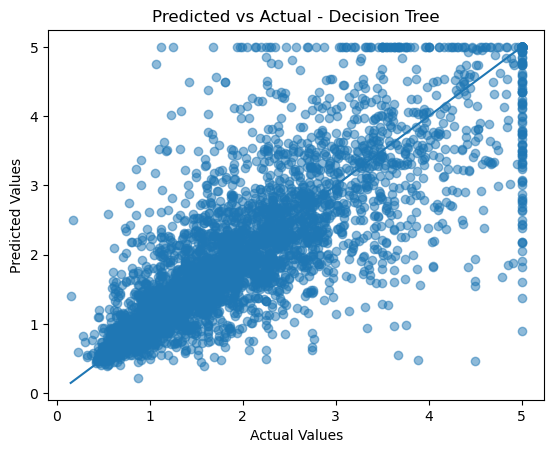

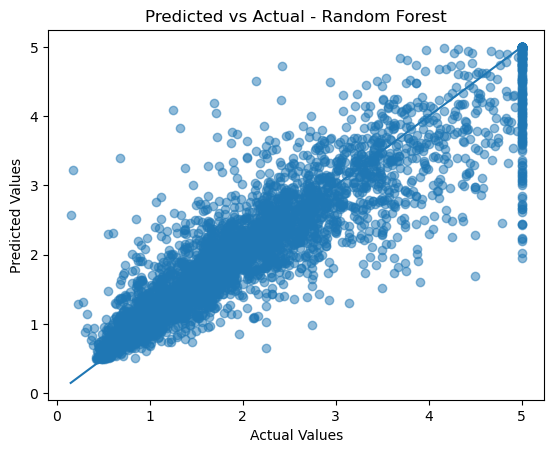

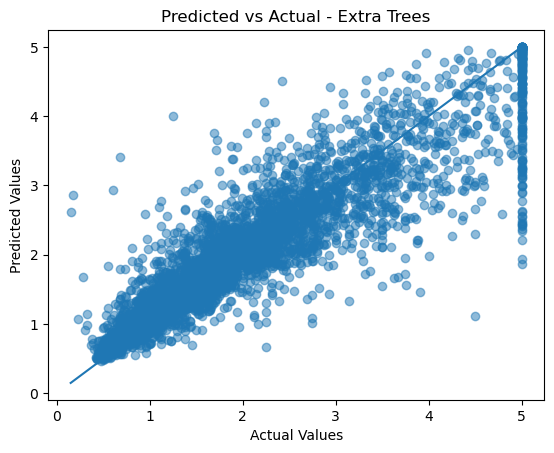

In [9]:
for name, res in results.items():
    plt.figure()
    plt.scatter(y_test, res["y_pred"], alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Predicted vs Actual - {name}")
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()])
    plt.show()

In [11]:
summary_df = pd.DataFrame({
    model: {
        "MSE": results[model]["MSE"],
        "RMSE": results[model]["RMSE"],
        "R2": results[model]["R2"]
    }
    for model in results
}).T


print("\nModel Comparison Summary")
print(summary_df)


Model Comparison Summary
                    MSE      RMSE        R2
Decision Tree  0.495235  0.703729  0.622076
Random Forest  0.255368  0.505340  0.805123
Extra Trees    0.253904  0.503889  0.806241
